# Abstract
In this assignment, I have used Google Colab jupyter notebook with GPU runtime environment

The **aim** of this notebook to *pull an image from the google drive using the google drive API and apply makeup to that image using pyhton script*. 

# Using Google Colaboratory
1. Open Google colab jupyter notebook and create a new notebook, name it
2. Set the run time environment to GPU because the library that we're going to use requries to run on GPU
3. On the left hand side, open code snippets and insert the code snippet for 'Downloading Files or Importing Data


![title](CodeSnippet.jpg)
   
The Drive requries OAuth2.0 for authentication.  
To pull the image from the google drive, I have used pydrive libraries that makes this OAuth2.0 authentication much easier.

# Let's get started with the Application of Virtual MakeUp!

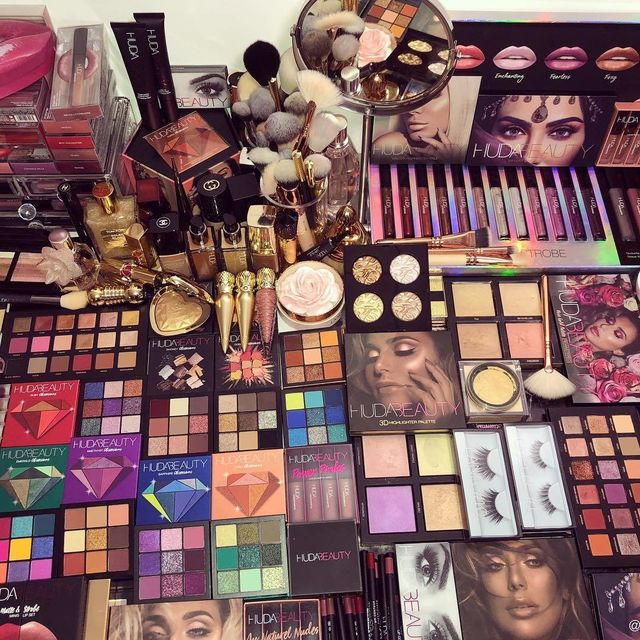

In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

![title](authent.jpg)

Upon running the above cell, a link and a text box is returned as shown in the image

Click on the link to verify the access from the google account you wish to,it returns a json file containing credentials.
Copy the verification link and paste it in the text box that appears.

*I have removed the credentials for the security reasons*

In the next step, copy the file_id of the file that you want to access and paste it in the file_id variable in the next cell given. Give a name to the downloaded file

In [3]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1ALXmFWrnaV7vhCDMPW2N4sPudTsqpjr-'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('IMG_nick.jpg')

Install the face_recognition library which is the world’s simplest face recognition library.

Built using dlib’s state-of-the-art face recognition built with deep learning. The model has an accuracy of 99.38% on the Labeled Faces in the Wild benchmark.

In [4]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=53a7e3591ac056a15270bf97f42fca431e25a7cb2a44f93cef26d84efdf86b4a
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


Running the following code, gives us a link. That link asks permission to access the Google drive. Basically, it gives out a verification link once you allow the permission (to access the drive from the google account you want to). Copy that verification code in the text box.

**Inporting the requried libraries**

In [4]:
import numpy as np
import io

import cv2
from google.colab.patches import cv2_imshow

import face_recognition
from PIL import Image, ImageDraw

Kudos!! Now, we have the access to the google drive!

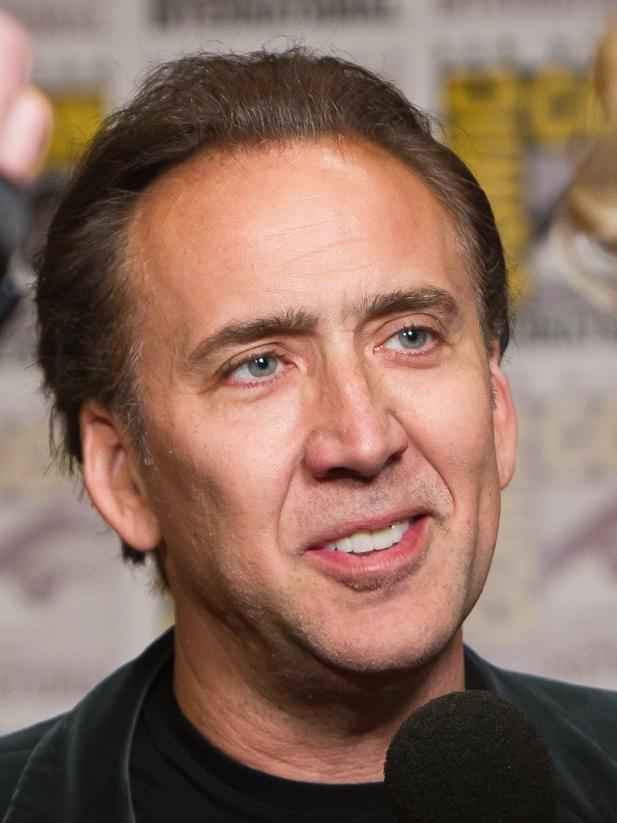

In [7]:
# Reading the downloaded image and displaying it using cv2.imread() funtion
image = cv2.imread("IMG_nick.jpg")
cv2_imshow(image)

# Detecting the facial Landmarks

To detect the key features I am using Face_recognition library that is built on dlib  

In [8]:
'''
face_landmarks() is a function in face_recognition library 
it further calls another function _raw_face_landmarks()
it returns a list of dictionary where key is String representing the 
key feature/ landmark 
value is the list of tuples of (x,y) coorindtes of that point 

It returns 68 facial landmarks like: eyes, nose bridge, lips, chin, eye brows
'''
face_landmarks_list = face_recognition.face_landmarks(image)

'''
 we've one face in the image that id downloaded
 load that to a variable || [0] represents the first face 
'''
face_landmarks = face_landmarks_list[0]

The image below helps in better understanding the facial landmarks. Observe that it has 68 landmarks, each of these have respective (x,y) coordinates. 
For instance, take right eye. According to the image it should ideally consist of 6 landmarks of tuples containting their coordinates

In [9]:
# an example for better understanding
right_eye = face_landmarks['right_eye']
right_eye

[(381, 348), (398, 334), (418, 330), (434, 337), (421, 347), (401, 349)]

Proved!

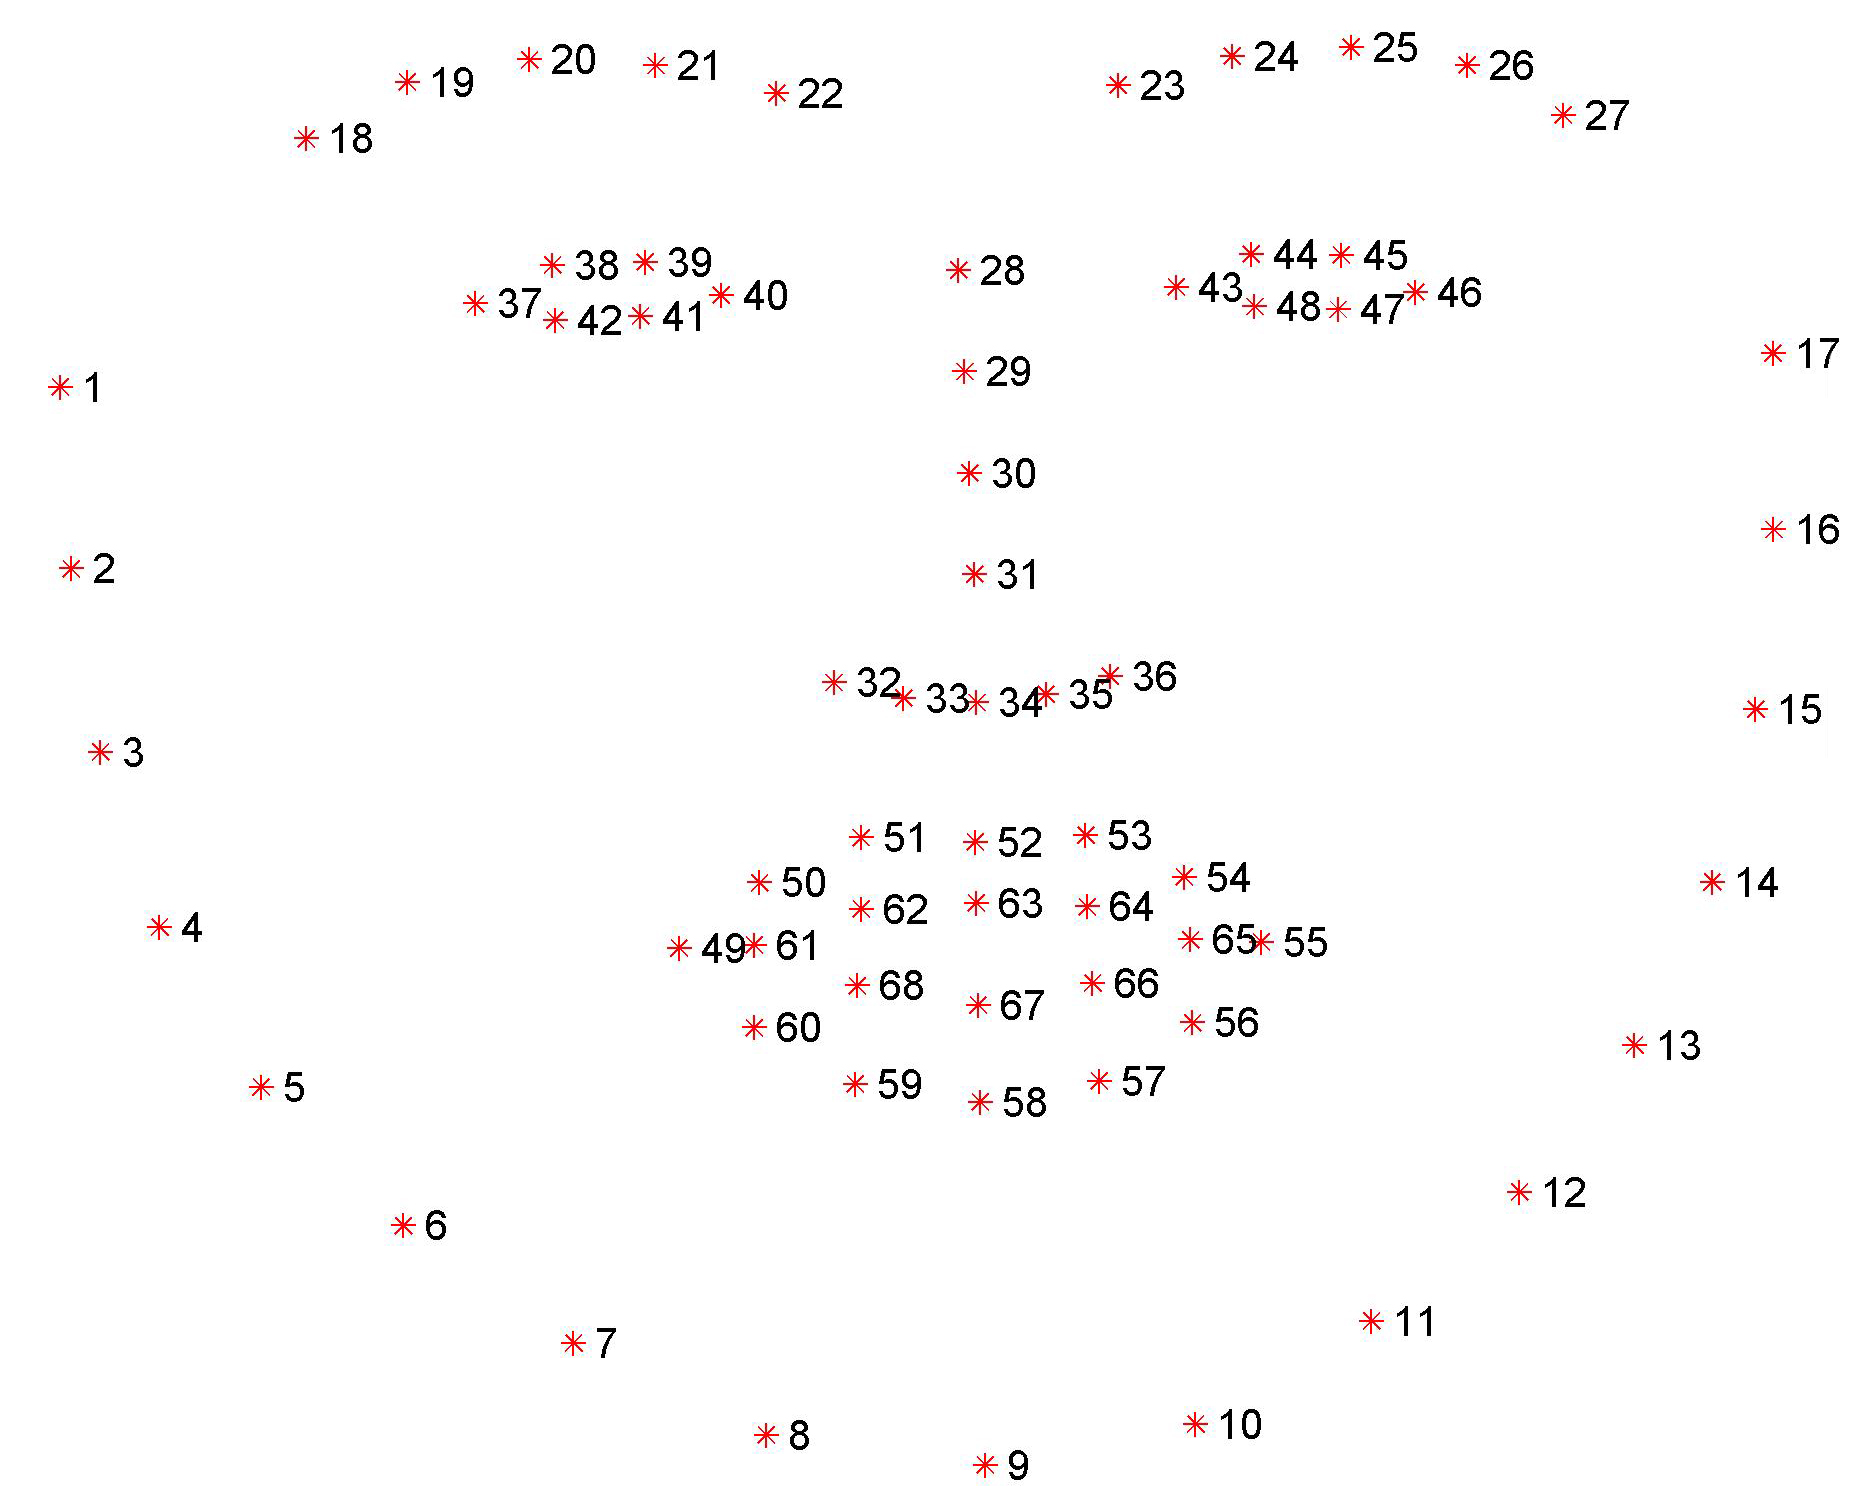

In [10]:
'''
convert an image from one color space to another
OpenCV reads the images in the order BGR (blue, green, red)
Pillow reads images in RGB format (red, green, blue)
we want to use both the Pillow function and the OpenCV function, thus convert BGR and RGB
'''
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(rgb_img)
d = ImageDraw.Draw(pil_image, 'RGBA')

In [11]:
# fill the lips with the color of your choice
# I used google colorpicker to pick the color of the lipstick
d.polygon(face_landmarks['top_lip'], fill=(230, 2, 52, 128))
d.polygon(face_landmarks['bottom_lip'], fill=(230, 2, 52, 128))
d.line(face_landmarks['top_lip'], fill=(230, 2, 52, 64), width=3)
d.line(face_landmarks['bottom_lip'], fill=(230, 2, 52, 64), width=3)

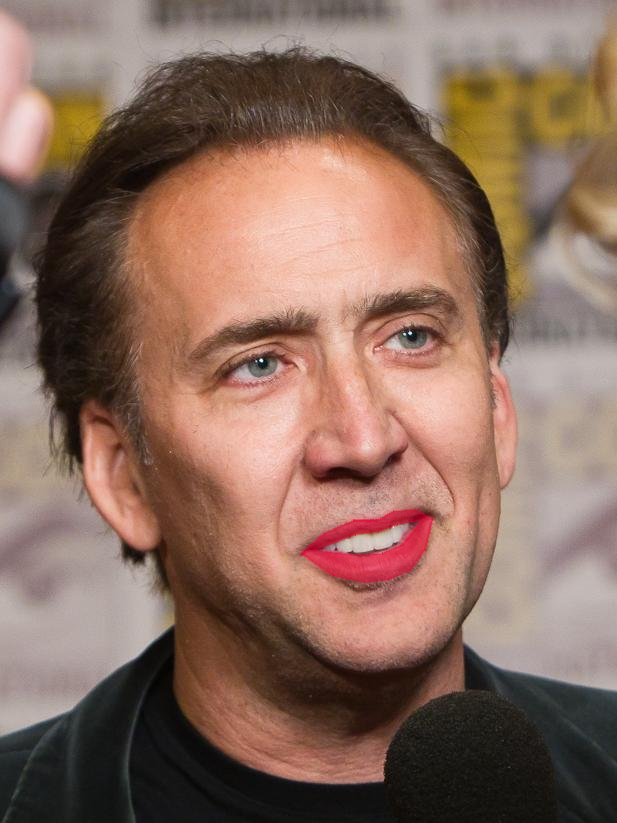

In [12]:
pil_image

In [13]:
# some eyeliner and kohl 
d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'] [0]], fill=(0, 0, 0, 110), width=3)
d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'] [0]], fill=(0, 0, 0, 110), width=3)

In [14]:
# eyebrows
d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=1)
d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=1)

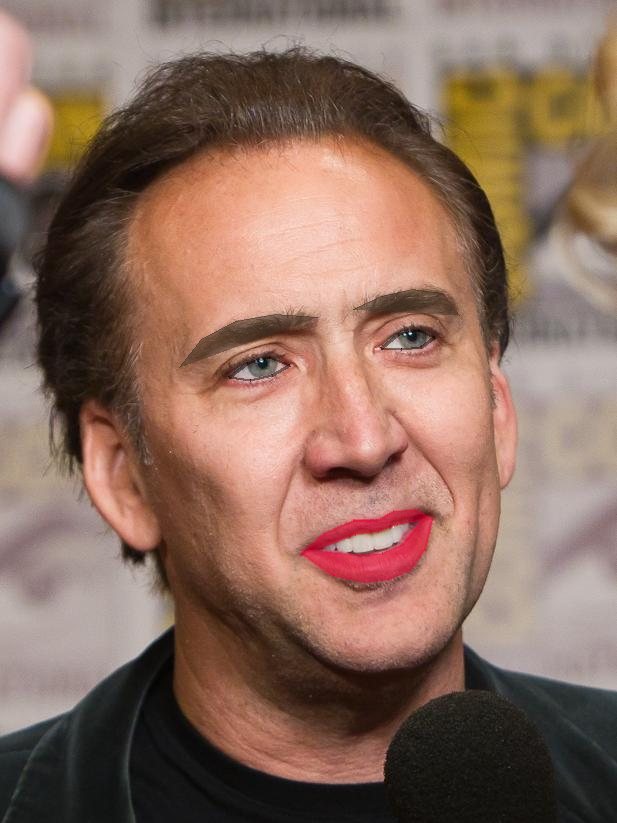

In [15]:
pil_image

# Blush On

In [16]:
# load the coordinates for the blush
points = np.loadtxt('point.txt')

In [17]:
from scipy import interpolate
from pylab import *
from skimage import color

In [18]:
# Color of blush on face
Rg, Gg, Bg = (252, 141, 193)
pil_image = np.asarray(pil_image)
height, width = pil_image.shape[:2]
intensity = 0.5
imOrg = pil_image.copy()
mid = 378
"""
Get the boundary points where we'd like to apply some rose blush
"""
def get_boundary_points(x, y):
    # interpolate i.e. obtain all the points between given vertice of polygon
    tck, u = interpolate.splprep([x, y], s=0, per=1)
    unew = np.linspace(u.min(), u.max(), 1000)
    xnew, ynew = interpolate.splev(unew, tck, der=0)
    tup = c_[xnew.astype(int), ynew.astype(int)].tolist()
    coord = list(set(tuple(map(tuple, tup))))
    coord = np.array([list(elem) for elem in coord])
    return np.array(coord[:, 0], dtype=np.int32), np.array(coord[:, 1], dtype=np.int32)

"""
Get all the points within selected polygon of blush
"""
def get_interior_points(x, y):
    intx = []
    inty = []

    """
    interior function to extend the list with points within 
    given range i.e. a to b
    """
    def ext(a, b, i):
        a, b = round(a), round(b)
        intx.extend(arange(a, b, 1).tolist())
        inty.extend((ones(b - a) * i).tolist())

    x, y = np.array(x), np.array(y)
    xmin, xmax = amin(x), amax(x)
    xrang = np.arange(xmin, xmax + 1, 1)
    for i in xrang:
        ylist = y[where(x == i)]
        ext(amin(ylist), amax(ylist), i)
    return np.array(intx, dtype=np.int32), np.array(inty, dtype=np.int32)

"""
Apply blush color on the face
"""
def apply_blush_color(r=Rg, g=Gg, b=Bg):
    global pil_image
    
    # normalize and change the intensities of pixels in 'LAB' color scheme
    val = color.rgb2lab((pil_image / 255.)).reshape(width * height, 3)
    L, A, B = mean(val[:, 0]), mean(val[:, 1]), mean(val[:, 2])
    L1, A1, B1 = color.rgb2lab(np.array((r / 255., g / 255., b / 255.)).reshape(1, 1, 3)).reshape(3, )
    ll, aa, bb = (L1 - L) * intensity, (A1 - A) * intensity, (B1 - B) * intensity
    val[:, 0] = np.clip(val[:, 0] + ll, 0, 100)
    val[:, 1] = np.clip(val[:, 1] + aa, -127, 128)
    val[:, 2] = np.clip(val[:, 2] + bb, -127, 128)
    
    # change the image array back to 'RGB' scheme
    pil_image = color.lab2rgb(val.reshape(height, width, 3)) * 255
    
"""
Smoothen the blush on cheek
"""
def smoothen_blush(x, y):
    global imOrg
    imgBase = zeros((height, width))
    
    """
    Fill the shape of blush with color
    c_() from pylab just zips two arrays index wise
    """
    cv2.fillConvexPoly(imgBase, np.array(c_[x, y], dtype='int32'), 1)
    # Blur the colour using GaussianBlur function
    imgMask = cv2.GaussianBlur(imgBase, (51, 51), 0)
    imgBlur3D = np.ndarray([height, width, 3], dtype='float')
    imgBlur3D[:, :, 0] = imgMask
    imgBlur3D[:, :, 1] = imgMask
    imgBlur3D[:, :, 2] = imgMask
    
    # Transform the image by adding blurred patch on cheek
    imOrg = (imgBlur3D * pil_image + (1 - imgBlur3D) * imOrg).astype('uint8')

In [19]:
x, y = points[0:5, 0], points[0:5, 1]
x, y = get_boundary_points(x, y)
x, y = get_interior_points(x, y)
apply_blush_color()
smoothen_blush(x, y)
smoothen_blush(2 * mid * ones(len(x)) - x, y)

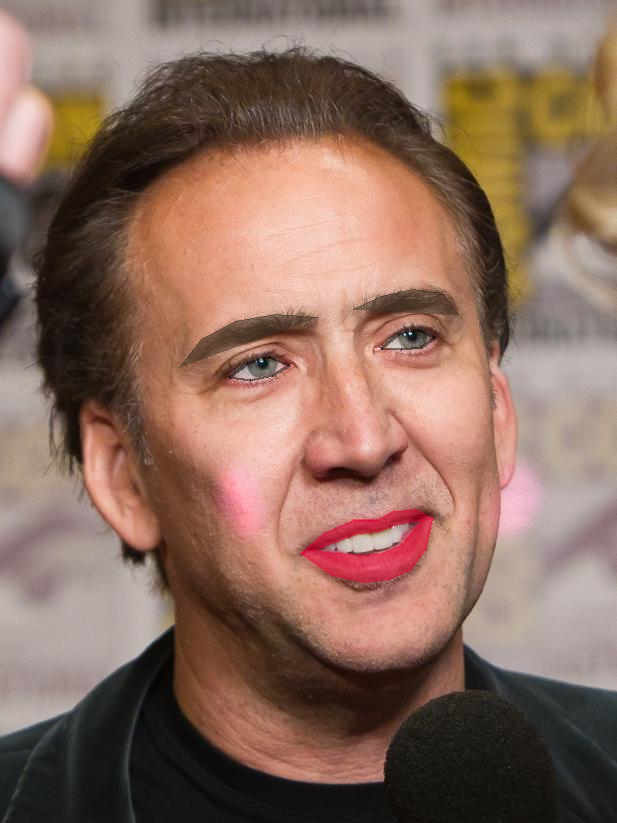

In [20]:
# displaying the final image! 
final = cv2.cvtColor(imOrg, cv2.COLOR_BGR2RGB)
cv2_imshow(final)

# Conclusion

By this, we come to the end of virtual make up application on the image using python script and face_recognition library.


# Author
### Indupriya Kompi Sadasivappa (Indu)

MSIS, Northeastern University, Boston, MA
 
kompisadasivappa.i@northeastern.edu
+1(857)-701-6039

# Citation

1. https://pythonhosted.org/PyDrive/quickstart.html
2. https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/
3. https://www.pyimagesearch.com/2017/03/27/how-to-install-dlib/
4. https://www.pyimagesearch.com/2018/09/19/pip-install-opencv/
5. Google Color picker

# Licensing

Copyright 2020 Indupriya Kompi Sadasivappa

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.